## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [83]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [84]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [85]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [86]:
train = train[cols_subset]
test = test[cols_subset]

In [87]:
train.head(10)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   
5           -0.994295              -0.993020             0.987722   
6           -0.987466              -0.990096             0.987722   
7           -0.977458              -0.991048             0.987926   
8           -0.983631              -0.992575             0.987754   
9           -0.986772              -0.983548             0.987754   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   
5         -0.942469                     -0.999942             -0.849632   
6         -0.940987                     -0.999602             -0.852150   
7         -0.940987                     -0.999466             -0.851017   
8         -0.940598                     -0.999457             -0.847971   
9         -0.940028                     -0.999812             -0.848294   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   
5              0.184823             -0.042126              -0.631053        1   
6              0.182170             -0.043010              -0.321330        1   
7              0.183779             -0.041976              -0.663915        1   
8              0.188982             -0.037364              -0.359866        1   
9              0.190310             -0.034417              -0.607453        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  
5  STANDING  
6  STANDING  
7  STANDING  
8  STANDING  
9  STANDING

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [88]:
# train
print(f"Empty cells: {train.isnull().sum().sum()}")
duplicateRows = train[train.duplicated()]
print(f"Dublicated rows: {len(duplicateRows)}")

Empty cells: 0
Dublicated rows: 0


In [89]:
# test
print(f"Empty cells: {test.isnull().sum().sum()}")
duplicateRows = test[test.duplicated()]
print(f"Dublicated rows: {len(duplicateRows)}")

Empty cells: 0
Dublicated rows: 0


Пропусков и дублей нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [90]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

Из того: что привлекло внимание:

1) Среднее значения номера субъекта испытаний - 17.41 из 30, то есть для участников с бОльшим номером проводилось больше измерений.

2) В большинстве показателей медиана существенно отличается от среднего, что может свидетельствовать о наличии выбросов.

3) Некоторые (например, tBodyAccMag-mean() и tBodyAcc-max()-X) имеют схожие тенденции распределения

In [91]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [92]:
# train
train_categories = train['Activity'].value_counts().to_frame().reset_index()
train_categories

index  Activity
0              LAYING      1407
1            STANDING      1374
2             SITTING      1286
3             WALKING      1226
4    WALKING_UPSTAIRS      1073
5  WALKING_DOWNSTAIRS       986

In [93]:
maxx = train['Activity'].value_counts().max()
minn = train['Activity'].value_counts().min()
diff = (maxx - minn)/maxx * 100
print(diff)

29.92181947405828


Таким образом, разница составляет 29,92% и данные train сбалансированы

In [94]:
# test
test_categories = test['Activity'].value_counts().to_frame().reset_index()
test_categories

index  Activity
0              LAYING       537
1            STANDING       532
2             WALKING       496
3             SITTING       491
4    WALKING_UPSTAIRS       471
5  WALKING_DOWNSTAIRS       420

In [95]:
# test
maxx = test['Activity'].value_counts().max()
minn = test['Activity'].value_counts().min()
diff = (maxx - minn)/maxx * 100
print(diff)

21.787709497206702


Разница составляет 21.78% и данные test также сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

Для того, чтобы посчитать корреляции таргета, переведём категориальную переменную в числовую.

In [96]:
train_dum = pd.get_dummies(train, drop_first=True)

In [97]:
train_dum.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewne

Данная таблица показывает, что значения коэффициентов корреляции в основном не близки к нулю, что говорит о наличии взаимосвязей между различными параметрами. Например, у медианной величины рывка тела по оси Х и энергии ускорения тела в интервале частоты значение коэффициента корреляции равно 0.5, что свидетельствует о довольно сильной связи. При этом, не стоит учитывать свящь между сходими параметрами (например, максимальным и медианным значением одной и той же величины).

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

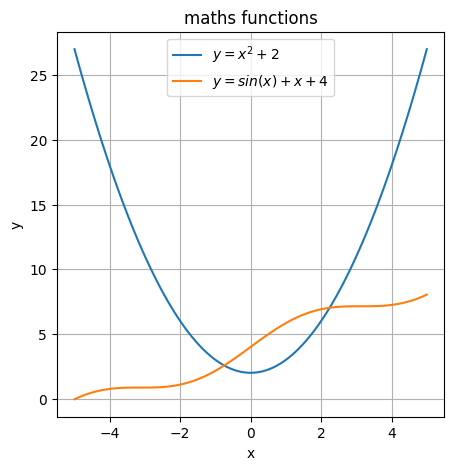

In [98]:
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(5, 5))

plt.plot(x, x**2 + 2, label = '$y = x^2 + 2$')
plt.plot(x, np.sin(x) + x + 4, label = '$y = sin(x) + x + 4$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('maths functions')
plt.legend(loc='best')
plt.grid()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

In [99]:
# Поменяем местами две строки в тестовом датафрейме, чтобы графики совпадали
temp = test_categories.iloc[3].copy()
test_categories.iloc[3] = test_categories.iloc[2]
test_categories.iloc[2] = temp
test_categories

index  Activity
0              LAYING       537
1            STANDING       532
2             SITTING       491
3             WALKING       496
4    WALKING_UPSTAIRS       471
5  WALKING_DOWNSTAIRS       420

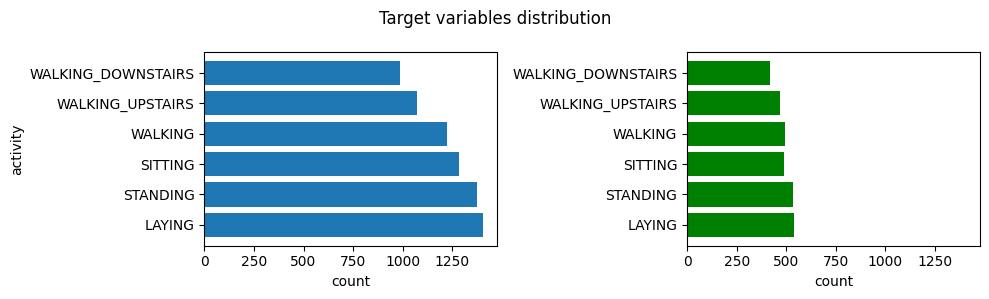

In [100]:
plt.figure(figsize=(10, 3))
ax = plt.subplot(1,2,1)
plt.barh(train_categories['index'], train_categories['Activity'])
plt.xlabel("count")
plt.ylabel('activity')
plt.subplot(1,2,2,sharex=ax, sharey=ax)
plt.barh(test_categories['index'], test_categories['Activity'], color='green')
plt.xlabel("count")
plt.suptitle('Target variables distribution')
plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?) - правда

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

Начнем с тренировочного датафрейма

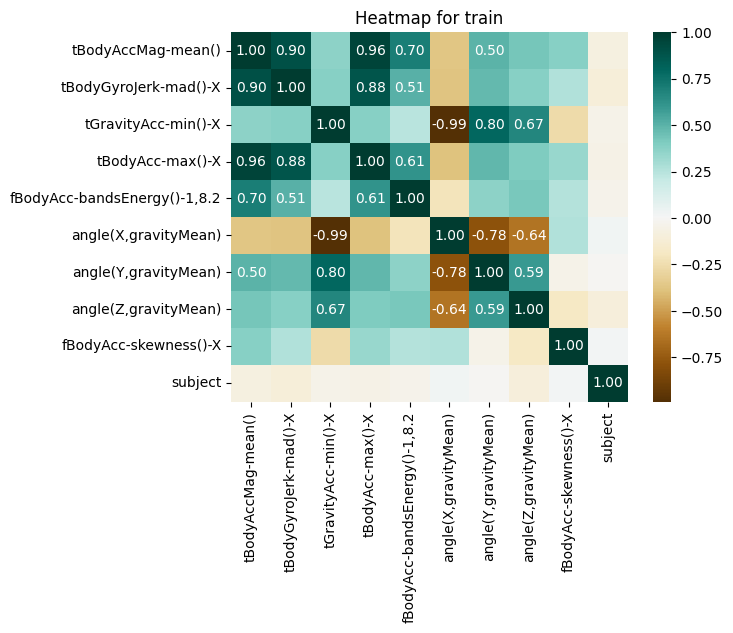

In [101]:
res = sns.heatmap(train.corr(), cmap="BrBG", annot=True, fmt="0.2f")
for t in res.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Heatmap for train")
plt.show()

Заметим, что вычислять коэффициент корреляции для порядковых переменных не имеет смысла, так как он не дает никаких представлений об объекте и реальных взаимосвязях между его признаками.

Также признак асимметричности частоты ускорения тела по оси Х имеет крайне слабые значения корреляции со всеми признаками, поэтому при проведении дальнейшего анализа его потенциально (но не точно!) можно не учитывать.

Теперь построим хитмап для тестовых данных

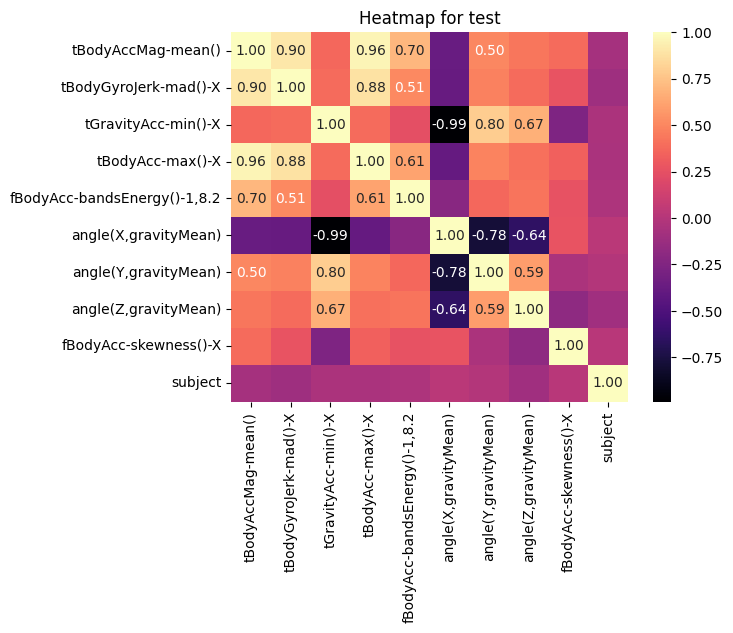

In [102]:
res = sns.heatmap(train.corr(), cmap="magma", annot=True, fmt="0.2f")
for t in res.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Heatmap for test")
plt.show()

Выводы аналогичны тем, что мы сделали по результатам хитмапа для тренирочного датафрейма

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

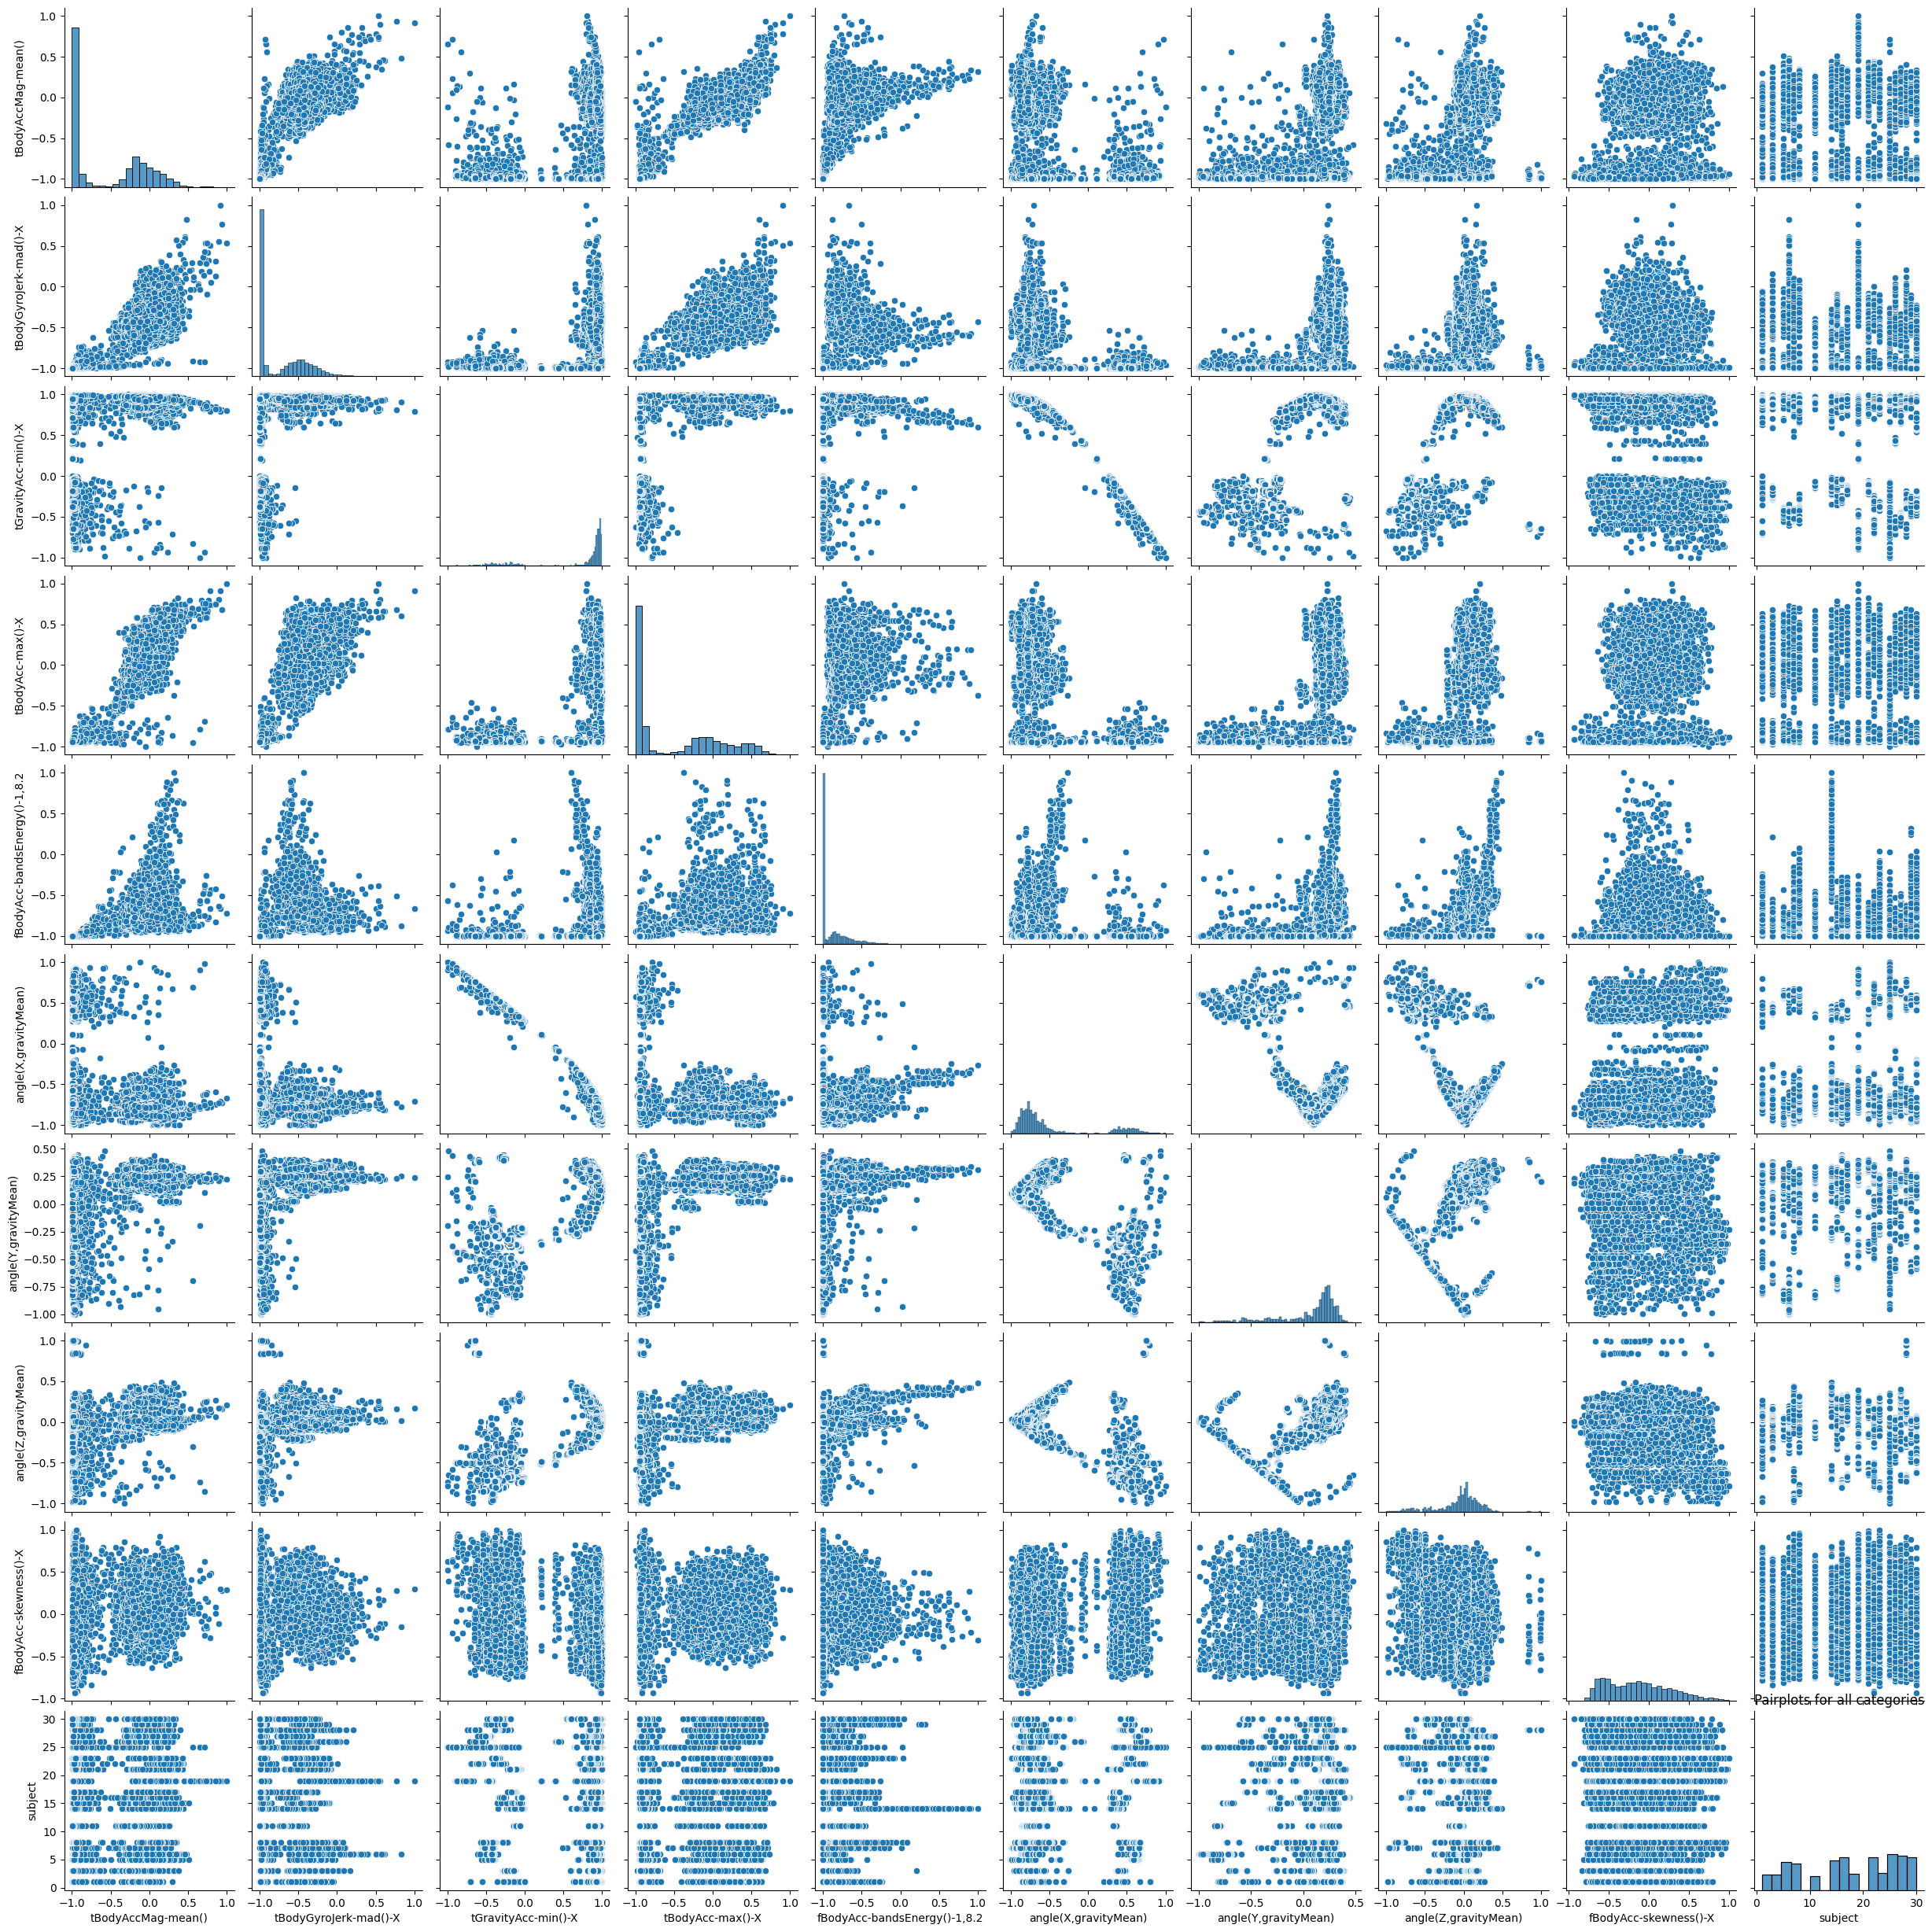

In [103]:
sns.pairplot(train)
plt.title('Pairplots for all categories')
plt.show()

Анализировать 100 графиков очень трудно, поскольку крайне проблематично концентрироваться на каком-то одном конкретном графике для его детального изучения. Еще очень многие показатели имеют похожие графики, что делает их различие еще более трудным.

Ранее мы рассматривали в основном корреляцию между величинами. А данные графики показывают то, как распределены значения визуально. На данных графиках очень заметны выбросы, которые не проявлялись при подсчете коэффициента корреляции.

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

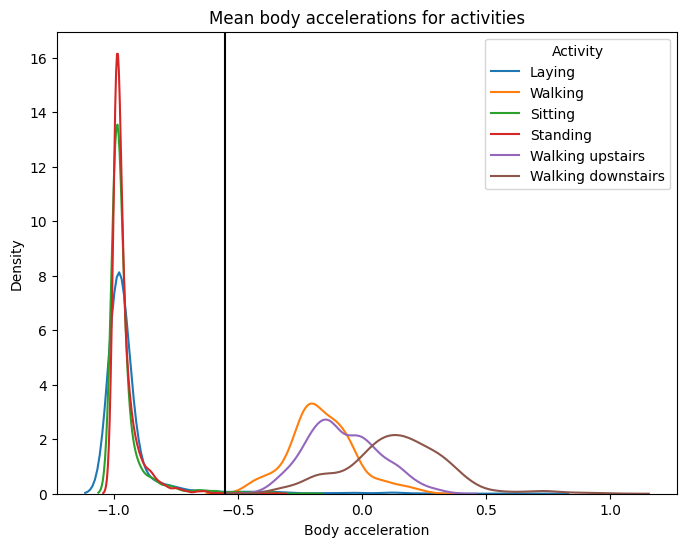

In [104]:
plt.subplots(figsize=(8, 6))
sns.kdeplot(data = train[train['Activity'] == 'LAYING'], x='tBodyAccMag-mean()', label='Laying')
sns.kdeplot(data = train[train['Activity'] == 'WALKING'], x='tBodyAccMag-mean()', label='Walking')
sns.kdeplot(data = train[train['Activity'] == 'SITTING'], x='tBodyAccMag-mean()', label='Sitting')
sns.kdeplot(data = train[train['Activity'] == 'STANDING'], x='tBodyAccMag-mean()', label='Standing')
sns.kdeplot(data = train[train['Activity'] == 'WALKING_UPSTAIRS'], x='tBodyAccMag-mean()', label='Walking upstairs')
sns.kdeplot(data = train[train['Activity'] == 'WALKING_DOWNSTAIRS'], x='tBodyAccMag-mean()', label='Walking downstairs')
level = -0.55
plt.axvline(level, color='black')
plt.title("Mean body accelerations for activities")
plt.legend(title='Activity')
plt.xlabel('Body acceleration')
plt.show()

Рассчитаем, какая доля отклонений есть в каждой категории активности

In [105]:
sum_static = 0
sum_dynamic = 0
for i in test_categories['index']:
  if i in ['LAYING', 'STANDING', 'SITTING']:
    res = len(train[(train['Activity'] == i) & (train['tBodyAccMag-mean()'] > level)]) / len(train[train['Activity'] == i])
    print(i, res)
    sum_static += res
  else:
    res = len(train[(train['Activity'] == i) & (train['tBodyAccMag-mean()'] < level)]) / len(train[train['Activity'] == i])
    print(i, res)
    sum_dynamic += res

LAYING 0.03411513859275053
STANDING 0.002183406113537118
SITTING 0.012441679626749611
WALKING 0.0
WALKING_UPSTAIRS 0.0
WALKING_DOWNSTAIRS 0.0


Для двух категорий (статические и динамические активности)

In [106]:
print(f'Static: {sum_static}\nDynamic: {sum_dynamic}')

Static: 0.04874022433303726
Dynamic: 0.0


Для динамических активностей доля неверных ответов равна 0 (а сами значения распределены приблизительно от -0.5 до 0.5), а для статических очень мала. Это говорит о том, что данный признак хорошо разделяет активности на 2 категории.

Низкий процент ошибок может быть связан с тем, что данный признак - это среднее значение ускорения, поэтому для каждой из активностей он будет показывать примерно схожие усредненные результаты, которые не зависят от выбросов (например, резких толчков)

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

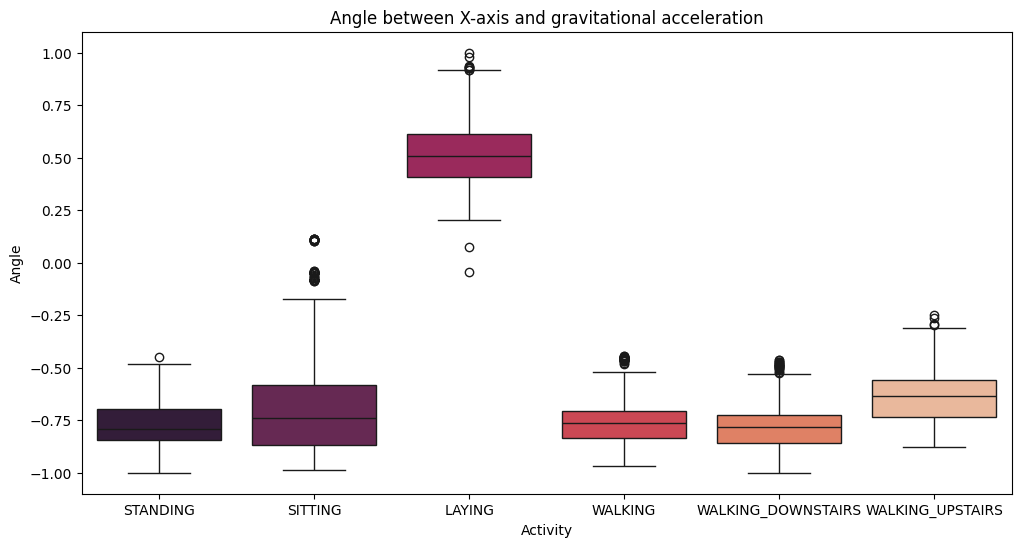

In [107]:
plt.subplots(figsize=(12, 6))
sns.boxplot(data=train, x='Activity', y='angle(X,gravityMean)', palette='rocket')
plt.title('Angle between X-axis and gravitational acceleration')
plt.ylabel('Angle')
plt.show()

Можно заметить, что все активности, кроме laying (лежания) имеют схожий угол. То есть по данному признаку их можно отнести к одной категории. Когда человек лежит, его тело расположено в особом горизонтальном положении, поэтому угол и получается и другой. То есть, по признаку "угол между осью Х и усредненной гравитационной составляющей ускорения" данные можно также разделить на 2 категории, но уже другие.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

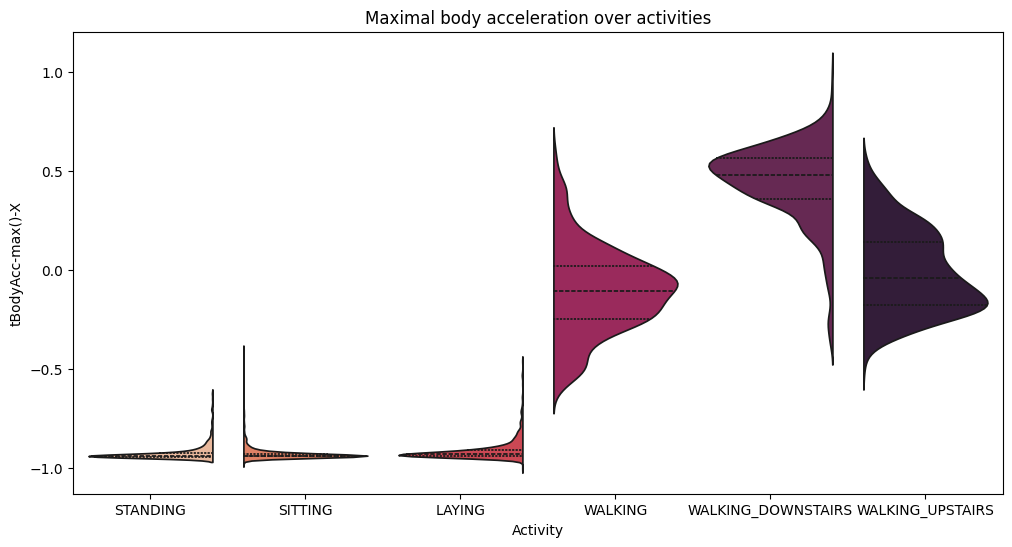

In [108]:
plt.subplots(figsize=(12, 6))
sns.violinplot(data=train, x='Activity', y='tBodyAcc-max()-X', palette='rocket_r', split=True, inner='quart')
plt.title('Maximal body acceleration over activities')
plt.show()

В данной случае прослеживается разбиение активностей по группам, аналогичным заданию 9. В рамках одной группы максимальные значения ускорения по оси Х имеют схожие значения, за исключением walking downstairs (спуска вниз) - тут максимальное значение заметно выше, чем у других динамических активностей.

Это может быть связяно с тем, что при спуске человек двигается быстрее, так как ему проще перемещаться

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [109]:
train1 = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]
train2 = train[(train['Activity'] != 'WALKING') & (train['Activity'] != 'WALKING_DOWNSTAIRS') & (train['Activity'] != 'WALKING_UPSTAIRS')]
# Посмотрим на то, что получилось (например, на статические активности)
train2.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

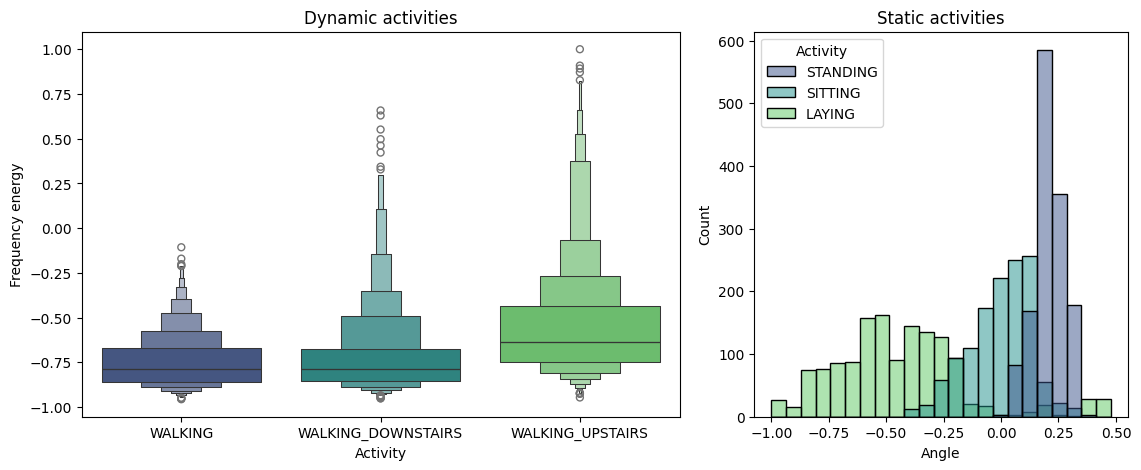

In [110]:
plt.figure(figsize=(13.5, 5))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 5)
gs.update(wspace = 0.5, hspace = 0.3)
plt.subplot(gs[0, :3])
sns.boxenplot(data=train1, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', palette='viridis')
plt.title('Dynamic activities')
plt.ylabel('Frequency energy')
plt.subplot(gs[0, 3:])
sns.histplot(data=train2, x='angle(Y,gravityMean)', hue='Activity', palette='viridis')
plt.title('Static activities')
plt.xlabel('Angle')
plt.ylabel('Count')
plt.show()

На первом графике можно заметить, что медианное значение величины энергия ускорения тела в интервале частоты у активности "Подъем вверх" больше, чем у других активностей из категории динамических.

На втором графике можно увидеть, что все величины имеют распределение, похожее на нормальное (с разными значениями мат. ожидания и с разной дисперсией), но если графики у лежания и сидения намного более пологие, чем у стояния, которое имеет очень заостренный график с наименьшим значением дисперсии. Поэтому гистограмма для standing выделяется  

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

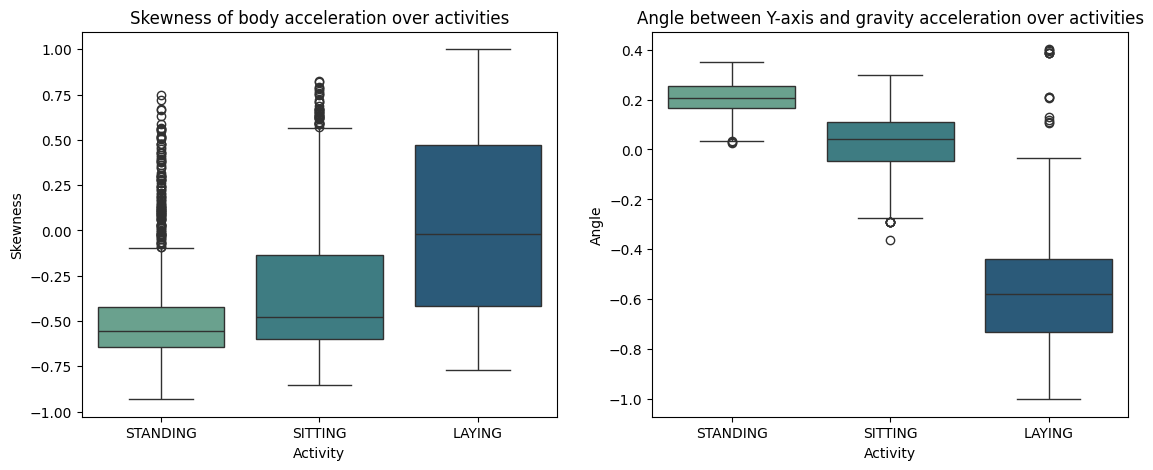

In [111]:
plt.figure(figsize=(13.5, 5))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 6)
gs.update(wspace = 1, hspace = 0.3)
plt.subplot(gs[0, :3])
sns.boxplot(data=train2, x='Activity', y='fBodyAcc-skewness()-X', palette='crest')
plt.title('Skewness of body acceleration over activities')
plt.ylabel('Skewness')
plt.subplot(gs[0, 3:])
sns.boxplot(data=train2[train2['fBodyAcc-skewness()-X'] < -0.376], x='Activity', y='angle(Y,gravityMean)', palette='crest')
plt.title('Angle between Y-axis and gravity acceleration over activities')
plt.ylabel('Angle')
plt.show()

На первом графике кажется, что активности standing и sitting отличаются от laying, так как большая часть их значений и медианы лежат в другом диапазоне. Однако внутри самих категорий это различие не столь сильно, поэтому только по первому графику судить довольно сложно.

На втором графике видно, что у sitting медиана угла равна 0, в отличие от остальных, поэтому это позволяет выделить данную категорию.

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

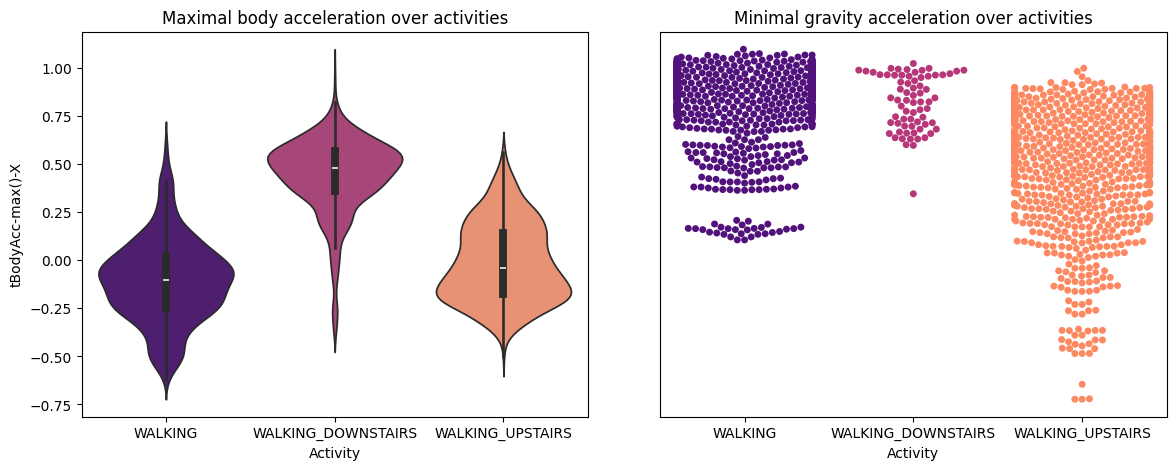

In [112]:
plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 6)
gs.update(wspace = 0.6, hspace = 0.3)
plt.subplot(gs[0, :3])
sns.violinplot(data=train1, x='Activity', y='tBodyAcc-max()-X', palette='magma')
plt.title('Maximal body acceleration over activities')
plt.subplot(gs[0, 3:])
sns.swarmplot(data=train1[train1['tBodyAcc-max()-X'] < 0.157], x='Activity', y='tGravityAcc-min()-X', palette='magma')
plt.title('Minimal gravity acceleration over activities')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

В данном случае можно выделить активность walking.

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [113]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 38s, sys: 615 ms, total: 6min 39s
Wall time: 3min 48s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [114]:
df_2_comp

x          y          Activity
0    -25.520004 -20.739208          STANDING
1     22.175642 -71.424644          STANDING
2     23.656492 -70.702286          STANDING
3     13.737759 -69.566162          STANDING
4     20.227449 -70.275978          STANDING
...         ...        ...               ...
7347  47.439510  31.107607  WALKING_UPSTAIRS
7348  49.750328  31.521679  WALKING_UPSTAIRS
7349  52.292648  34.477104  WALKING_UPSTAIRS
7350  52.235847  34.471226  WALKING_UPSTAIRS
7351  48.880589  30.345352  WALKING_UPSTAIRS

[7352 rows x 3 columns]

In [115]:
import plotly.express as px
plot = px.scatter(df_2_comp, x='x', y='y', color='Activity', title='Activities scatter')
plot.show()

Да, некоторые группы активностей можно отделить от других (например, laying или standing & sitting  от остальных)

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [116]:
plot = px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity', title='Activities scatter 3d-diagram')
plot.show()

Повернем его под таким углом, чтобы было видно, что между категориями снова можно провести некоторые границы, которые совпадают с теми, что бы на 2d-графике.

3d-график получился даже более наглядным

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [117]:
def category(row):
  # static
  if row['tBodyAccMag-mean()'] < -0.55:
    if row['angle(X,gravityMean)'] > 0.05:
      return 'LAYING'
    elif row['angle(Y,gravityMean)'] > 0.15:
      return 'STANDING'
    else:
     return 'SITTING'

  if row['tBodyAcc-max()-X'] >= 0.25:
    return 'WALKING_DOWNSTAIRS'
  elif row['fBodyAcc-bandsEnergy()-1,8.2'] < -0.7:
    return 'WALKING'
  return 'WALKING_UPSTAIRS'

def predict(df: pd.DataFrame):
    df['Prediction'] = df.apply(lambda row : category(row), axis=1)
    return df['Prediction']

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [118]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8083514689880305
Accuracy on test set => 0.7533084492704445


Я счастлив!

__Место для мема и/или фидбэка__

![](https://drive.google.com/uc?export=view&id=1VNr_ZxqLwFp0_eR0On1lukznTWY3imXb)